## Import Used Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches


from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('bmh')

## Read Input Files

In [2]:

# Read the data from CSV file
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

# Get basic information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80692 entries, 0 to 80691
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   passenger_unique_identifier                      80692 non-null  float64
 1   driver_unique_identifier                         71166 non-null  float64
 2   approximate_distance_meter                       80692 non-null  int64  
 3   final_price                                      80692 non-null  float64
 4   waiting_time_enabled                             80692 non-null  int64  
 5   second_destination_final_price                   80692 non-null  float64
 6   round_ride_final_price                           80692 non-null  float64
 7   for_friend_enabled                               80692 non-null  int64  
 8   is_voucher_used                                  0 non-null      float64
 9   intercity                   

In [3]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7774 entries, 0 to 7773
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   passenger_unique_identifier                      7774 non-null   float64
 1   approximate_distance_meter                       7774 non-null   int64  
 2   final_price                                      7774 non-null   float64
 3   waiting_time_enabled                             7774 non-null   int64  
 4   second_destination_final_price                   7774 non-null   float64
 5   round_ride_final_price                           7774 non-null   float64
 6   for_friend_enabled                               7774 non-null   int64  
 7   is_voucher_used                                  0 non-null      float64
 8   intercity                                        7774 non-null   int64  
 9   request_datetime              

In [4]:
data.head()

,passenger_unique_identifier,driver_unique_identifier,approximate_distance_meter,final_price,waiting_time_enabled,second_destination_final_price,round_ride_final_price,for_friend_enabled,is_voucher_used,intercity,...,second_destination_longitude,requested_service_type,days_since_passenger_first_ride,days_since_passenger_first_request,in_hurry_enabled,ride (target),treatment_group,"('new_origin_latitude', 'new_origin_longitude')",new_origin_latitude,new_origin_longitude
0,2561296.00,7475532.00,6404,1200.00,0,0.00,0.00,0,NaN,0,...,29.49,A,2126,2126,0,1,A,"(29.488835573287513, 60.95799813622983)",29.50,60.96
1,66990258.00,7676730.00,5805,1700.00,0,0.00,0.00,0,NaN,0,...,29.49,A,963,963,0,1,A,"(29.52766176780866, 60.95992511595708)",29.53,60.96
2,115656004.00,7640864.00,6978,1480.00,0,0.00,0.00,0,NaN,0,...,29.51,A,6,150,0,1,A,"(29.52231811966853, 60.929978801338585)",29.53,60.93
3,103175504.00,2544250.00,4540,1000.00,0,0.00,0.00,0,NaN,0,...,29.48,A,343,343,0,1,A,"(29.4924079879218, 60.975839633216694)",29.47,60.98
4,104326018.00,7860690.00,7109,1500.00,0,0.00,0.00,0,NaN,0,...,29.52,A,340,340,0,1,A,"(29.51355175849473, 60.99051466786983)",29.53,60.99


In [5]:
data_test.head()

,passenger_unique_identifier,approximate_distance_meter,final_price,waiting_time_enabled,second_destination_final_price,round_ride_final_price,for_friend_enabled,is_voucher_used,intercity,request_datetime,...,second_destination_latitude,second_destination_longitude,requested_service_type,days_since_passenger_first_ride,days_since_passenger_first_request,in_hurry_enabled,treatment_group,"('new_origin_latitude', 'new_origin_longitude')",new_origin_latitude,new_origin_longitude
0,86535006.00,5163,1300.00,0,0.00,0.00,0,NaN,0,2012-11-22 13:36:38+03:30,...,29.50,29.50,A,624,624,0,A,"(29.496908089483664, 60.95093813927035)",29.52,60.95
1,52505314.00,6102,1300.00,0,0.00,0.00,0,NaN,0,2012-11-22 00:08:02+03:30,...,29.49,29.49,A,1189,1282,0,A,"(29.46089609862487, 60.9252559761269)",29.48,60.92
2,124126394.00,4619,1260.00,0,0.00,0.00,0,NaN,0,2012-11-22 13:34:58+03:30,...,29.51,29.51,A,1,1,0,A,"(29.488796156443147, 60.95678957841472)",29.48,60.96
3,71296786.00,2210,920.00,0,0.00,0.00,0,NaN,0,2012-11-22 08:20:06+03:30,...,29.50,29.50,A,895,895,0,A,"(29.509874819344816, 60.95307799681066)",29.50,60.96
4,86119764.00,3599,1140.00,0,0.00,0.00,0,NaN,0,2012-11-22 10:14:43+03:30,...,29.52,29.52,A,344,344,0,A,"(29.499068686791556, 60.93856551182067)",29.51,60.94


## Find Columns with Missing Values in Data

In [6]:
# Check for missing values
print("Missing values summary:")
print(data.isnull().sum())

Missing values summary:
passenger_unique_identifier                            0
driver_unique_identifier                            9526
approximate_distance_meter                             0
final_price                                            0
waiting_time_enabled                                   0
second_destination_final_price                         0
round_ride_final_price                                 0
for_friend_enabled                                     0
is_voucher_used                                    80692
intercity                                              0
request_datetime                                       0
origin_latitude                                        0
origin_longitude                                       0
destination_latitude                                   0
destination_longitude                                  0
second_destination_latitude                            0
second_destination_longitude                           0
request

In [7]:
# Check for missing values
print("Missing values summary:")
print(data_test.isnull().sum())

Missing values summary:
passenger_unique_identifier                           0
approximate_distance_meter                            0
final_price                                           0
waiting_time_enabled                                  0
second_destination_final_price                        0
round_ride_final_price                                0
for_friend_enabled                                    0
is_voucher_used                                    7774
intercity                                             0
request_datetime                                      0
origin_latitude                                       0
origin_longitude                                      0
destination_latitude                                  0
destination_longitude                                 0
second_destination_latitude                           0
second_destination_longitude                          0
requested_service_type                                0
days_since_passenger_fir

In [8]:
(data.isnull().sum()/(len(data)))*100

passenger_unique_identifier                         0.00
driver_unique_identifier                           11.81
approximate_distance_meter                          0.00
final_price                                         0.00
waiting_time_enabled                                0.00
second_destination_final_price                      0.00
round_ride_final_price                              0.00
for_friend_enabled                                  0.00
is_voucher_used                                   100.00
intercity                                           0.00
request_datetime                                    0.00
origin_latitude                                     0.00
origin_longitude                                    0.00
destination_latitude                                0.00
destination_longitude                               0.00
second_destination_latitude                         0.00
second_destination_longitude                        0.00
requested_service_type         

In [9]:
(data_test.isnull().sum()/(len(data_test)))*100

passenger_unique_identifier                         0.00
approximate_distance_meter                          0.00
final_price                                         0.00
waiting_time_enabled                                0.00
second_destination_final_price                      0.00
round_ride_final_price                              0.00
for_friend_enabled                                  0.00
is_voucher_used                                   100.00
intercity                                           0.00
request_datetime                                    0.00
origin_latitude                                     0.00
origin_longitude                                    0.00
destination_latitude                                0.00
destination_longitude                               0.00
second_destination_latitude                         0.00
second_destination_longitude                        0.00
requested_service_type                              0.00
days_since_passenger_first_ride

In [10]:
data["price_per_meter"] = data.apply(lambda df: 0 if df["approximate_distance_meter"] == 0 
                                                                                 else df["final_price"]/df["approximate_distance_meter"], axis=1)

In [11]:
data.treatment_group.value_counts()

treatment_group
A    70386
B      780
Name: count, dtype: int64

In [12]:
data.loc[data.treatment_group == "A", "ride (target)"].value_counts()

ride (target)
1    56589
0    13797
Name: count, dtype: int64

In [13]:
data['treatment_group'].fillna(data['treatment_group'].mode()[0], inplace=True)

## Find Duplicate Records in Data

In [14]:
data.duplicated().sum()

0

In [15]:
data_test.duplicated().sum()

0

## Rename Target Columns in Data for more Convenient Data Manipulation

In [16]:
data = data.rename(columns = {"ride (target)":"target"})

## Drop Useless Columns

In [17]:
data = data.drop(["('new_origin_latitude', 'new_origin_longitude')", "is_voucher_used", "driver_unique_identifier", 
                                                              "origin_latitude", "origin_longitude", "destination_latitude", "destination_longitude",
                                                              "second_destination_latitude", "second_destination_longitude"], axis="columns")

## Drop Rows with Missing Data

In [18]:
data["requested_service_type"].unique()

array(['A', 'B', 'E', 'D', 'C'], dtype=object)

In [19]:
data.loc[:, "requested_service_type"].value_counts()

requested_service_type
A    80312
E      145
B      121
D       70
C       44
Name: count, dtype: int64

In [20]:
data_sort = data.copy()

In [21]:
data_sort['request_datetime'] = pd.to_datetime(data_sort['request_datetime'])

In [22]:
data = data.dropna()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80692 entries, 0 to 80691
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   passenger_unique_identifier         80692 non-null  float64
 1   approximate_distance_meter          80692 non-null  int64  
 2   final_price                         80692 non-null  float64
 3   waiting_time_enabled                80692 non-null  int64  
 4   second_destination_final_price      80692 non-null  float64
 5   round_ride_final_price              80692 non-null  float64
 6   for_friend_enabled                  80692 non-null  int64  
 7   intercity                           80692 non-null  int64  
 8   request_datetime                    80692 non-null  object 
 9   requested_service_type              80692 non-null  object 
 10  days_since_passenger_first_ride     80692 non-null  int64  
 11  days_since_passenger_first_request  80692

## Target Data Distribution

In [24]:
#check Imbalance in data

#group instances based on the classes in target variable
class_counts = data.groupby("target").size()

columns=['target','count','percentage']
outcome=list(data['target'].unique())
count=list()
percentage=list()

#Calculate the percentage of each value of the target variable from total
for val in range(len(outcome)):
    count.append(class_counts[val])
    percent=(class_counts[val]/len(data))*100
    percentage.append(percent)

# Convert the calulated values into a dataframe
imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df   

,target,count,percentage
0,1,23506,29.13
1,0,57186,70.87


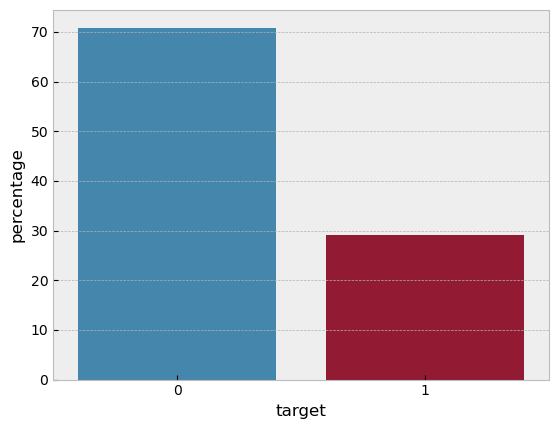

In [25]:
sns.barplot(data=imbalance_df,x=imbalance_df['target'],y=imbalance_df['percentage'])
plt.show()

## Numerical data distributio

In [26]:
list(set(data.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [27]:
df_continuous = data.select_dtypes(include = ['float64'])
df_continuous.head()

,passenger_unique_identifier,final_price,second_destination_final_price,round_ride_final_price,new_origin_latitude,new_origin_longitude,price_per_meter
0,2561296.00,1200.00,0.00,0.00,29.50,60.96,0.19
1,66990258.00,1700.00,0.00,0.00,29.53,60.96,0.29
2,115656004.00,1480.00,0.00,0.00,29.53,60.93,0.21
3,103175504.00,1000.00,0.00,0.00,29.47,60.98,0.22
4,104326018.00,1500.00,0.00,0.00,29.53,60.99,0.21


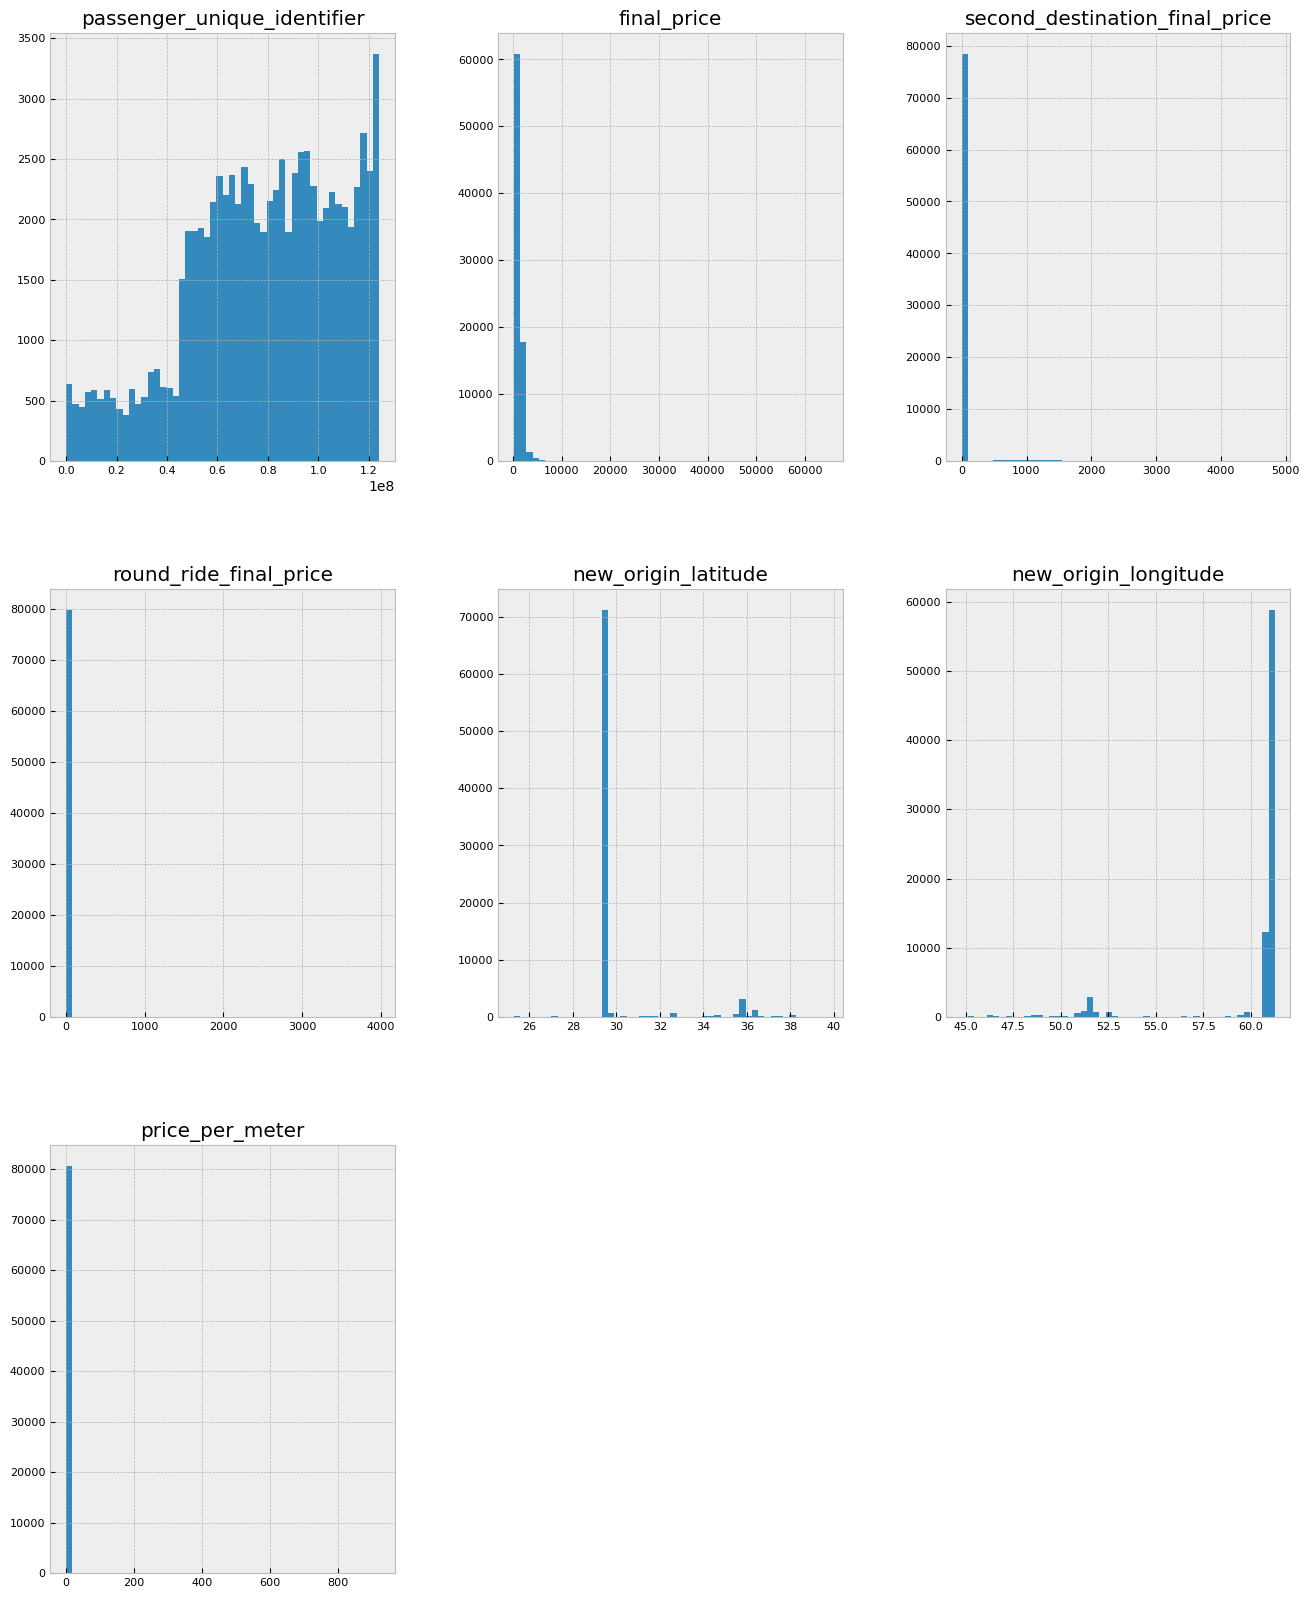

In [28]:
df_continuous.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Correlation

In [29]:
df_num = data.select_dtypes(include = ['int64', 'float64'])
df_num_corr = df_num.corr()['target']
features_list = df_num_corr.sort_values(ascending=False)[1:]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)[1:]
print("Features correlation with target:\n{}\n".format(features_list))
print("There is {} strongly correlated value with target:\n{}".format(len(golden_features_list), golden_features_list))

Features correlation with target:
new_origin_longitude                  0.52
passenger_unique_identifier           0.05
waiting_time_enabled                  0.02
second_destination_final_price        0.02
round_ride_final_price                0.00
for_friend_enabled                   -0.01
price_per_meter                      -0.01
intercity                            -0.04
days_since_passenger_first_ride      -0.05
days_since_passenger_first_request   -0.05
in_hurry_enabled                     -0.06
final_price                          -0.13
approximate_distance_meter           -0.17
new_origin_latitude                  -0.50
Name: target, dtype: float64

There is 1 strongly correlated value with target:
new_origin_longitude   0.52
Name: target, dtype: float64


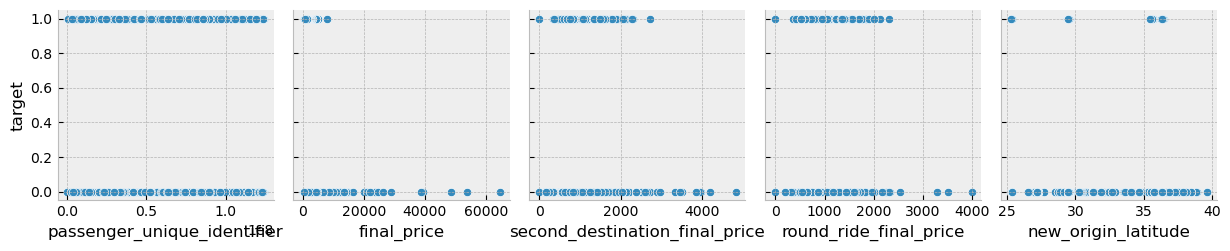

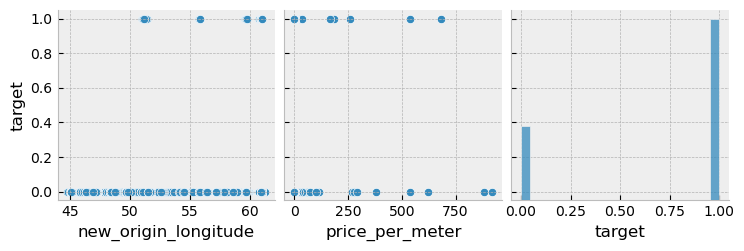

In [30]:
df_cont_tgt = pd.concat([df_continuous, data['target']], axis=1)
for i in range(0, len(df_cont_tgt.columns), 5):
    sns.pairplot(data=df_cont_tgt,
                 x_vars=df_cont_tgt.columns[i:i+5],
                 y_vars=['target'])

In [37]:
import operator

individual_feats_df = []
for i in range(0, len(df_cont_tgt.columns)):
    if df_cont_tgt.columns[i] != 'target':
        tmpDF = df_cont_tgt[[df_cont_tgt.columns[i], 'target']]
        tmpDF = tmpDF[tmpDF[df_cont_tgt.columns[i]] != 0]
        individual_feats_df.append(tmpDF)

all_corrs = {feat.columns[0]: feat.corr()['target'][0] for feat in individual_feats_df}
all_corrs = sorted(all_corrs.items(), key=operator.itemgetter(1))
for (key, value) in all_corrs:
    print("{:>30}: {:>30}".format(key, value))

           new_origin_latitude:           -0.49777290240949995
                   final_price:            -0.1315659019522139
second_destination_final_price:           -0.07931684242419373
        round_ride_final_price:           -0.03423143253404754
               price_per_meter:          -0.010571372500730739
   passenger_unique_identifier:            0.04541026602357687
          new_origin_longitude:             0.5244873043838515


## Feature to feature relationship

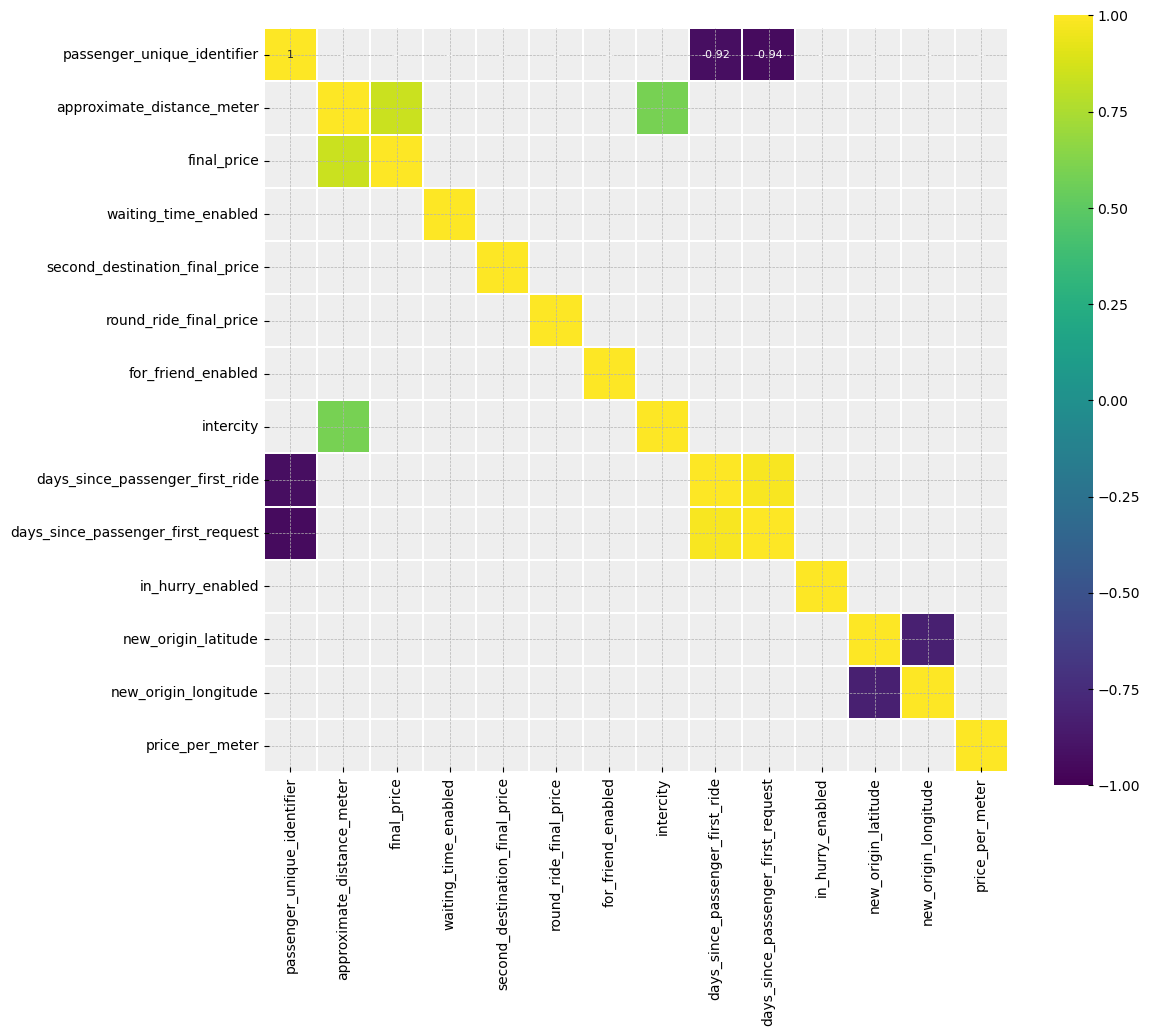

In [39]:
corr = df_num.drop('target', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={'size':8}, square=True);

## Convert Column Containing Date to DateTime

In [ ]:
data['request_datetime'] = pd.to_datetime(data['request_datetime'])

In [ ]:
# Analyze data types
print("Data types:")
print(data.dtypes)

## Investigate Unique Values of Features to Decide if they should be converted to Categorical Type

In [ ]:
data.nunique()

## Split the Data into Train and Validation

In [ ]:
y = data.target
data.drop(['target'], axis=1, inplace=True)

X_train, X_val, y_train, y_val = train_test_split(data, y, stratify = y, test_size=.2, random_state =10)

## Covert some Features to Categorical

In [ ]:
def dummies_encode(df, categorical_features):
  """
  One-hot encodes categorical features in a dataframe.

  Args:
      df (pandas.DataFrame): The dataframe to encode.
      categorical_features (list): A list of column names to encode.

  Returns:
      pandas.DataFrame: The encoded dataframe.
  """
  # Create a copy of the dataframe to avoid modifying the original
  df_encoded = df.copy()

  # Encode each categorical feature
  for feature in categorical_features:
    # Use get_dummies with drop_first=True to avoid creating a dummy variable
    # for the first category (reduces multicollinearity)
    dummies = pd.get_dummies(df_encoded[feature], prefix=feature, drop_first=False)
    # Concatenate the original feature with the encoded dummies
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    # Drop the original categorical feature
    df_encoded.drop(feature, axis=1, inplace=True)

  return df_encoded

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype in ["int64", "object"]]

In [ ]:
# Get categories from encoded training data (assuming categorical features are at the end)
categories = {col: X_train[col].unique() for col in low_cardinality_cols}

# Encode training data
X_train = dummies_encode(X_train.copy(), low_cardinality_cols)

# Apply encoding to validation data using categories from training data
for feature in low_cardinality_cols:
  dummies = pd.get_dummies(X_val[feature], prefix=feature, columns=categories[feature], drop_first=False)
  X_val = pd.concat([X_val, dummies], axis=1)
  X_val.drop(feature, axis=1, inplace=True)


In [ ]:
def one_hot_encode(X_train, X_val, low_cardinality_cols):
    # Use as many lines of code as you need!
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    OH_X_train_cols = pd.DataFrame(ohe.fit_transform(X_train[low_cardinality_cols]))
    OH_X_valid_cols = pd.DataFrame(ohe.transform(X_val[low_cardinality_cols]))
    
    OH_X_train_cols.index = X_train.index
    OH_X_valid_cols.index = X_val.index
    
    X_train_num_cols = X_train.drop(low_cardinality_cols, axis = 1)
    X_valid_num_cols = X_val.drop(low_cardinality_cols, axis = 1)
    
    OH_X_train = pd.concat([OH_X_train_cols, X_train_num_cols], axis = 1) # Your code here
    OH_X_valid = pd.concat([OH_X_valid_cols, X_valid_num_cols], axis = 1) # Your code here
    
    OH_X_train.columns = OH_X_train.columns.astype(str)
    OH_X_valid.columns = OH_X_valid.columns.astype(str)

    return OH_X_train.copy(), OH_X_valid.copy()
    
X_train, X_val = one_hot_encode(X_train, X_val, low_cardinality_cols)

In [ ]:
X_train.head()

In [ ]:
X_val.head()

In [ ]:
data = data.rename(columns = {"target_1":"target"})

## Find Columns with Duplicate Values in Other Columns and Dropping them

In [ ]:
sum(data['destination_longitude'] == data['second_destination_longitude'])

In [ ]:
sum(data['destination_latitude'] == data['second_destination_latitude'])

In [ ]:
sum(data['destination_longitude'] == data['origin_longitude'])

In [ ]:
sum(data['destination_latitude'] == data['origin_latitude'])

In [ ]:
data = data.drop(["origin_longitude", "destination_longitude", "second_destination_longitude", 
                  "origin_latitude", "destination_latitude", "second_destination_latitude"], axis="columns")

In [ ]:
X_train = X_train.drop(["origin_longitude", "destination_longitude", "second_destination_longitude", 
                  "origin_latitude", "destination_latitude", "second_destination_latitude"], axis="columns")

X_val = X_val.drop(["origin_longitude", "destination_longitude", "second_destination_longitude", 
                  "origin_latitude", "destination_latitude", "second_destination_latitude"], axis="columns")

In [ ]:
X_train.head()

In [ ]:
X_val.head()

## Investigate the Range, Mean, and Standard Deviation of Numerical Features

In [ ]:
# Descriptive statistics for numerical features
print("Descriptive statistics:")
X_train.describe().T

## Extract Numerical and Categorical Columns Names

In [ ]:
X_train.info()

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

## Investigate Categorical Features' characteristics like their Unique Values and their most Frequent Values

In [ ]:
data[cat_cols].describe(include='all').T

## Drop Column with only 1 Unique Value

In [ ]:
data = data.drop("requested_service_type", axis="columns")

## Extract Useful Info from Date Column

In [ ]:
def date_info_extractor(data, column):
    data.loc[:, 'request_hour'] = data[column].dt.hour
    data.loc[:, 'request_weekday'] = data[column].dt.day_name()
    data.loc[:, 'request_date'] = data[column].dt.day
    # data.loc[:, 'request_month'] = data['request_datetime'].dt.month  # The given training dataset is for a specific month, so extracting it will be waste of time and resource
    # data.loc[:, 'request_day'] = data[column].dt.dayofweek

    return data

# X_train = date_info_extractor(X_train.copy(), "request_datetime")
# X_val = date_info_extractor(X_val.copy(), "request_datetime")
data = date_info_extractor(data.copy(), "request_datetime")

In [ ]:
data.nunique()

In [ ]:
def one_hot_encode(X_train, X_val, low_cardinality_cols):
    # Use as many lines of code as you need!
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    OH_X_train_cols = pd.DataFrame(ohe.fit_transform(X_train[low_cardinality_cols]))
    OH_X_valid_cols = pd.DataFrame(ohe.transform(X_val[low_cardinality_cols]))
    
    OH_X_train_cols.index = X_train.index
    OH_X_valid_cols.index = X_val.index
    
    X_train_num_cols = X_train.drop(low_cardinality_cols, axis = 1)
    X_valid_num_cols = X_val.drop(low_cardinality_cols, axis = 1)
    
    OH_X_train = pd.concat([OH_X_train_cols, X_train_num_cols], axis = 1) # Your code here
    OH_X_valid = pd.concat([OH_X_valid_cols, X_valid_num_cols], axis = 1) # Your code here
    
    OH_X_train.columns = OH_X_train.columns.astype(str)
    OH_X_valid.columns = OH_X_valid.columns.astype(str)

    return OH_X_train.copy(), OH_X_valid.copy()

In [ ]:
X_train, X_val = one_hot_encode(X_train, X_val, ["request_weekday",
                                                      'request_hour', 'request_date'])

In [ ]:
X_train.info()

In [ ]:
X_val.head()

In [ ]:
data = dummies_encode(data.copy(), ['request_weekday'])

## Investigate Newly Extracted Features from Date Column Distribution

In [ ]:
# Datetime features
plt.figure(figsize=(22, 6))
# Hour of day
plt.subplot(221)
sns.countplot(data, x='request_hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total number of requests')
plt.title('Hourly Variation of Total number of requests')

# Date
plt.subplot(223)
sns.countplot(data, x='request_date')
plt.xlabel('Date')
plt.ylabel('Total number of requests')
plt.title('Daily Variation of Total number of requests')

# # Day of week
plt.subplot(222)
sns.countplot(data, x='request_weekday',  order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                                       'Thursday', 'Friday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of requests')
plt.title('Weekly Variation of Total number of requests')

# # # Month
# plt.subplot(224)
# sns.countplot(data, x='request_month')
# plt.xlabel('Month')
# plt.ylabel('Total number of requests')
# plt.title('Monthly Variation of Total number of requests');

## Investigate different Price Columns Duplication

In [ ]:
sum(data['final_price'] == data['second_destination_final_price'])

In [ ]:
sum(data['final_price'] == data['round_ride_final_price'])

In [ ]:
sum(data['second_destination_final_price'] == data['round_ride_final_price'])

## Investigate Numerical Columns Variance and Skewness

In [ ]:
data[num_cols].var()

In [ ]:
data[num_cols].skew()

In [ ]:
data[num_cols].columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data with some skewed features


# Plotting histograms
data.hist(figsize=(10, 6))
plt.suptitle("Distribution of features")
plt.xlabel("Feature value")
plt.ylabel("Number of samples")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
data["price_per_meter"].value_counts()

In [ ]:
data["price_per_meter"].hist(figsize=(10, 6))
plt.suptitle("Distribution of features")
plt.xlabel("Feature value")
plt.ylabel("Number of samples")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Plotting boxplots (optional)
data.plot(kind="box", figsize=(12, 6))
plt.suptitle("Boxplots of features")
plt.tight_layout()
plt.show()

## Resolving the Skewness of Positively-skewed Features

In [ ]:
tmp_data = data.copy()

skewed_cols = ['approximate_distance_meter', 'final_price', 'second_destination_final_price',
                                                           'round_ride_final_price','final_price', 'second_destination_final_price',
                                                           'round_ride_final_price', 'days_since_passenger_first_ride', 'days_since_passenger_first_request']
# for skewed_col in skewed_cols:
#     tmp_data[skewed_col] = np.sqrt(tmp_data[skewed_col])

from scipy import stats

transformed_data = {}
for col in skewed_cols:
    # Find the optimal lambda for Box-Cox transformation
    # tmp_data[col] = tmp_data[col].map(lambda x: x if x > 0 else 0.0001)  # Filter positive values (creates a DataFrame)
    
    # tmp_data[col] , _ = stats.boxcox(tmp_data[col])

    # # Apply the transformation with the optimal lambda
    # if bcx_lambda == 0:
    epsilon = 1e-8  # A small positive value
    tmp_data[col] = np.log1p(tmp_data[col] + epsilon)  # Handle lambda of 0 (log transformation)
    # else:
    #     tmp_data[col] = stats.boxcox(tmp_data[col], lmbda=bcx_lambda)[0]

# Replace the original data with transformed data (optional)
# tmp_data[skewed_cols] = pd.DataFrame(np.log1p(tmp_data[skewed_cols]))

tmp_data[num_cols].skew()

In [ ]:
tmp_data['approximate_distance_meter'].unique()

In [ ]:
data['days_since_passenger_first_ride'].value_counts()

In [ ]:
data['days_since_passenger_first_request'].value_counts()

In [ ]:
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(121)
sns.distplot(data['days_since_passenger_first_ride'])
plt.xlabel('Days Since Passenger First Ride')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Days Since Passenger First Ride')

plt.subplot(122)
sns.boxplot(data['days_since_passenger_first_ride'], color = 'cyan', showmeans=True, 
           meanprops={"marker":"o", "markerfacecolor":"Red", 
                      "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Days Since Passenger First Ride')
plt.title('Box plot of Days Since Passenger First Ride');

In [ ]:
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(121)
sns.distplot(data['days_since_passenger_first_request'])
plt.xlabel('Days Since Passenger First Request')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Days Since Passenger First Request')

plt.subplot(122)
sns.boxplot(data['days_since_passenger_first_request'], color = 'cyan', showmeans=True, 
           meanprops={"marker":"o", "markerfacecolor":"Red", 
                      "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Days Since Passenger First Request')
plt.title('Box plot of Days Since Passenger First Request');

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = data['target'],
           y = data['final_price'], palette = 'rainbow', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black",
                       "markersize":"10"}
)
plt.xlabel('Request to Ride Conversion')
plt.title ("Final Price vs Request to Ride Conversion");

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = data['target'],
           y = data['round_ride_final_price'], palette = 'rainbow', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black",
                       "markersize":"10"}
)
plt.xlabel('Request to Ride Conversion')
plt.title ("Round Ride Final Price vs Request to Ride Conversion");

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = data['target'],
           y = data['second_destination_final_price'], palette = 'rainbow', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black",
                       "markersize":"10"}
)
plt.xlabel('Request to Ride Conversion')
plt.title ("Second Destination Final Price vs Request to Ride Conversion");

In [ ]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sns.barplot(x=data['request_hour'], y = data['approximate_distance_meter'], palette = 'tab20')
plt.xlabel('Hour of Day')
plt.ylabel('Distance in Km')
plt.title ("Distance in Km vs Hour of Day")


# Date
plt.subplot(223)
sns.barplot(x = data['request_date'], y = data['approximate_distance_meter'], palette = 'tab20')
plt.xlabel('Date')
plt.ylabel('Distance in Km')
plt.title ("Distance in Km vs Date")

# Day of week
plt.subplot(224)
sns.barplot(x = data['request_weekday'], order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday'],
           y = data['approximate_distance_meter'], palette = 'tab10')
plt.xlabel('Days of week')
plt.ylabel('Distance in Km')
plt.title ("Distance in Km vs Days of week")
plt.tight_layout();


In [ ]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sns.barplot(x=data['request_hour'], y = data['final_price'], palette = 'tab20')
plt.xlabel('Hour of Day')
plt.ylabel('Final Price')
plt.title ("Final Price vs Hour of Day")

# Date
plt.subplot(223)
sns.barplot(x = data['request_date'], y = data['final_price'], palette = 'tab20')
plt.xlabel('Date')
plt.ylabel('Final Price')
plt.title ("Final Price vs Date")

# Day of week
plt.subplot(224)
sns.barplot(x = data['request_weekday'], order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday'],
           y = data['final_price'], palette = 'tab10')
plt.xlabel('Days of week')
plt.ylabel('Final Price')
plt.title ("Final Price vs Days of week")
plt.tight_layout();

In [ ]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sns.barplot(x=data['request_hour'], y = data['second_destination_final_price'], palette = 'tab20')
plt.xlabel('Hour of Day')
plt.ylabel('Second Destination Final Price')
plt.title ("Second Destination Final Price vs Hour of Day")

# Date
plt.subplot(223)
sns.barplot(x = data['request_date'], y = data['second_destination_final_price'], palette = 'tab20')
plt.xlabel('Date')
plt.ylabel('Second Destination Final Price')
plt.title ("Second Destination Final Price vs Date")

# Day of week
plt.subplot(224)
sns.barplot(x = data['request_weekday'], order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday'],
           y = data['second_destination_final_price'], palette = 'tab10')
plt.xlabel('Days of week')
plt.ylabel('Second Destination Final Price')
plt.title ("Second Destination Final Price vs Days of week")
plt.tight_layout();

In [ ]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sns.barplot(x=data['request_hour'], y = data['round_ride_final_price'], palette = 'tab20')
plt.xlabel('Hour of Day')
plt.ylabel('Round Ride Final Price')
plt.title ("Round Ride Final Price vs Hour of Day")

# Date
plt.subplot(223)
sns.barplot(x = data['request_date'], y = data['round_ride_final_price'], palette = 'tab20')
plt.xlabel('Date')
plt.ylabel('Round Ride Final Price')
plt.title ("Round Ride Final Price vs Date")

# Day of week
plt.subplot(224)
sns.barplot(x = data['request_weekday'], order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday'],
           y = data['round_ride_final_price'], palette = 'tab10')
plt.xlabel('Days of week')
plt.ylabel('Round Ride Final Price')
plt.title ("Round Ride Final Price vs Days of week")
plt.tight_layout();

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(data['new_origin_latitude'].values, label = 'new_origin_latitude',color="b",bins = 100, ax=axes[0])
sns.distplot(data['new_origin_longitude'].values, label = 'new_origin_longitude',color="r",bins =100, ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [ ]:
data = data.loc[(data.new_origin_latitude > 29.0) & (data.new_origin_latitude < 31.0)]
data = data.loc[(data.new_origin_longitude > 60.0) & (data.new_origin_longitude < 62.0)]
data_new = data.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(data_new['new_origin_latitude'].values, label = 'new_origin_latitude',color="b",bins = 100, ax=axes[0])
sns.distplot(data_new['new_origin_longitude'].values, label = 'new_origin_longitude',color="r",bins =100, ax=axes[1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

## Scaling the Numerical Features

In [ ]:
uscaled_data = data.copy()

In [ ]:
uscaled_X_train = X_train.copy()
uscaled_X_val = X_val.copy()

In [ ]:
uscaled_X_train.columns

In [ ]:
print("Descriptive statistics:")
uscaled_X_train.describe().T

In [ ]:
X_train, X_val = one_hot_encode(X_train, X_val, ['request_hour', 'request_date'])

In [ ]:
X_train.info()

In [ ]:
rob_scaler = RobustScaler()

standardable_feats = [ 'approximate_distance_meter', 'final_price', 'second_destination_final_price', 'round_ride_final_price',
                      'days_since_passenger_first_ride', 'days_since_passenger_first_request']

for col_name in standardable_feats: 
    X_train["scaled_"+col_name] = rob_scaler.fit_transform(X_train[col_name].values.reshape(-1,1))
    X_val["scaled_"+col_name] = rob_scaler.transform(X_val[col_name].values.reshape(-1,1))

X_train.drop(standardable_feats, axis=1, inplace=True)
X_val.drop(standardable_feats, axis=1, inplace=True)

In [ ]:
print("Descriptive statistics:")
X_train.info()

In [ ]:
X_train.drop(["request_day", "request_datetime"], axis=1, inplace=True)
X_val.drop(["request_day", "request_datetime"], axis=1, inplace=True)

In [ ]:
print("Descriptive statistics:")
data.describe().T

In [ ]:
def convert_bool_to_int(df, boolean_features):
  """
  Converts boolean features in a dataframe to integers (0 or 1).

  Args:
      df (pandas.DataFrame): The dataframe to convert.
      boolean_features (list): A list of column names with boolean data.

  Returns:
      pandas.DataFrame: The dataframe with converted features.
  """
  for feature in boolean_features:
    df[feature] = df[feature].astype(int)
  return df


In [ ]:
# Data conversion for booleans
data = convert_bool_to_int(data, data.select_dtypes("bool"))

In [ ]:
# Label encoding for categoricals
for colname in data.select_dtypes("object"):
    data[colname], _ = data[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = data.dtypes == int

## Applying Dimensionality Reduction to Verify whether or not the Data is Linearly Separable

In [ ]:
tmp_data.head()

In [ ]:
# New_df is from the random undersample data (fewer instances)
X = tmp_data.drop(['target', 'request_datetime', 
                    'passenger_unique_identifier'], axis=1)
y = tmp_data['target']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Event', 'Event']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Ride')
red_patch = mpatches.Patch(color='#AF0000', label='Ride')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Ride', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Ride', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Ride', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Ride', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Ride', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Ride', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [ ]:
# New_df is from the random undersample data (fewer instances)
X = data.drop(['target', 'request_datetime', 
                    'passenger_unique_identifier'], axis=1)
y = data['target']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Event', 'Event']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Ride')
red_patch = mpatches.Patch(color='#AF0000', label='Ride')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Ride', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Ride', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Ride', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Ride', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Ride', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Ride', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## Fitting Models on Imbalanced Data

In [ ]:
def modelfit(alg, xtrain, ytrain, X_val, y_val, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(xtrain, label=ytrain)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    # alg.fit(xtrain, ytrain,eval_metric='auc')
    alg.fit(xtrain, ytrain)

    #Predict training set:
    dtrain_predictions = alg.predict(xtrain)
    dtrain_predprob = alg.predict_proba(xtrain)[:,1]

    #Predict training set:
    dvalid_predictions = alg.predict(X_val)
    dvalid_predprob = alg.predict_proba(X_val)[:,1]

    def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))

    report_generate(ytrain, dtrain_predictions, dtrain_predprob, "Training Data")
    report_generate(y_val, dvalid_predictions, dvalid_predprob, "Validation Data")

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
# New_df is from the random undersample data (fewer instances)
# , 'request_datetime', 
#                     'passenger_unique_identifier', 'driver_unique_identifier'
# X_train = data.drop(['target','request_datetime'], axis=1)
# y_train = data['target']

modelfit(xgb1, X_train.to_numpy(), y_train, X_val.to_numpy(), y_val)

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
# New_df is from the random undersample data (fewer instances)
# , 'request_datetime', 
#                     'passenger_unique_identifier', 'driver_unique_identifier'
# X_train = data.drop(['target','request_datetime','passenger_unique_identifier', 'driver_unique_identifier'], axis=1)
# y_train = data['target']

X_train_new = X_train.drop(['passenger_unique_identifier'], axis=1)
X_val_new = X_val.drop(['passenger_unique_identifier'], axis=1)

modelfit(xgb1, X_train_new.to_numpy(), y_train, X_val_new.to_numpy(), y_val)

In [ ]:
# USING UNSCALED DATA
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
# New_df is from the random undersample data (fewer instances)
# , 'request_datetime', 
#                     'passenger_unique_identifier', 'driver_unique_identifier'

# temp_unscaled_data = uscaled_data.copy()

# # Label encoding for categoricals
# for colname in temp_unscaled_data.select_dtypes("object"):
#     temp_unscaled_data[colname], _ = temp_unscaled_data[colname].factorize()

# # All discrete features should now have integer dtypes (double-check this before using MI!)
# discrete_features = temp_unscaled_data.dtypes == int
# X_train = temp_unscaled_data.drop(['target','request_datetime'], axis=1)
# y_train = temp_unscaled_data['target']

# uscaled_X_train = uscaled_X_train.drop(['request_datetime'], axis=1)
# uscaled_X_val = uscaled_X_val.drop(['request_datetime'], axis=1)

modelfit(xgb1, uscaled_X_train.to_numpy(), y_train, uscaled_X_val.to_numpy(), y_val)

In [ ]:
# imbalanced_data = data.copy()

# # Label encoding for categoricals
# for colname in imbalanced_data.select_dtypes("object"):
#     imbalanced_data[colname], _ = imbalanced_data[colname].factorize()

# imbalanced_X = imbalanced_data.drop(['target', 'request_datetime'], axis=1)
# imbalanced_y = imbalanced_data['target']

# X_train, X_test, y_train, y_test = train_test_split(imbalanced_X, imbalanced_y, stratify = imbalanced_y, test_size=.25, random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train.to_numpy(), X_val.to_numpy(), y_train, y_val)

print(models)

## Use Undersampling to Deal with Imbalanced Dataset

In [ ]:
# xgb1 = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# We will undersample during cross validating
sss = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)

# undersampled_data = data.copy()
undersampled_X_train = X_train.copy()
undersampled_X_val = X_val.copy()

# Label encoding for categoricals
# for colname in undersampled_data.select_dtypes("object"):
#     undersampled_data[colname], _ = undersampled_data[colname].factorize()

# undersample_X = undersampled_data.drop(['target', 'request_datetime'], axis=1)
# undersample_y = undersampled_data['target']

# for train_index, test_index in sss.split(undersample_X, undersample_y):
#     print("Train:", train_index, "Test:", test_index)
#     undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
#     undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersampled_X_train = undersampled_X_train.values
undersampled_X_val = undersampled_X_val.values
undersample_y_train = y_train.values
undersample_y_val = y_val.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

undersample_val_accuracy = []
undersample_val_precision = []
undersample_val_recall = []
undersample_val_f1 = []
undersample_val_auc = []

xgb_params = {
 'learning_rate' :[1e-3, 1e-2, 0.1, 0.2, 0.3],
 'n_estimators' : [10, 100, 1000, 10000],
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]      
 }

rand_xgb = RandomizedSearchCV(XGBClassifier(objective= 'binary:logistic'), xgb_params, n_iter=4)

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
# X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
# print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersampled_X_train, undersample_y_train):
    # undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), XGBClassifier(objective= 'binary:logistic')) # SMOTE happens during Cross Validation not before..
    # undersample_model = undersample_pipeline.fit(undersample_X[train], undersample_y[train])
    # undersample_prediction = undersample_model.predict(undersample_X[test])

    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), rand_xgb) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersampled_X_train[train], undersample_y_train[train])
    best_est = rand_xgb.best_estimator_
    undersample_prediction = undersample_model.predict(undersampled_X_train[test])

    undersample_accuracy.append(undersample_pipeline.score(undersampled_X_train[test], undersample_y_train[test]))
    undersample_precision.append(precision_score(undersample_y_train[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_y_train[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_y_train[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_y_train[test], undersample_prediction))

    undersample_val_prediction = undersample_model.predict(undersampled_X_val)
    undersample_val_accuracy.append(undersample_pipeline.score(undersampled_X_val, undersample_y_val))
    undersample_val_precision.append(precision_score(undersample_y_val, undersample_val_prediction))
    undersample_val_recall.append(recall_score(undersample_y_val, undersample_val_prediction))
    undersample_val_f1.append(f1_score(undersample_y_val, undersample_val_prediction))
    undersample_val_auc.append(roc_auc_score(undersample_y_val, undersample_val_prediction))


print("Training Data Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Training Data Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Training Data Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("Training Data F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print("Training Data ROC AUC: {:.2f}".format(np.mean(undersample_auc)))
print("*"*100)
print("Validation Data Accuracy Score: {:.2f}".format(np.mean(undersample_val_accuracy)))
print("Validation Data Precision Score: {:.2f}".format(np.mean(undersample_val_precision)))
print("Validation Data Recall Score: {:.2f}".format(np.mean(undersample_val_recall)))
print("Validation Data F1 Score: {:.2f}".format(np.mean(undersample_val_f1)))
print("Validation Data ROC AUC: {:.2f}".format(np.mean(undersample_val_auc)))

In [ ]:
undersampled_data = data.copy()

# # Label encoding for categoricals
# for colname in undersampled_data.select_dtypes("object"):
#     undersampled_data[colname], _ = undersampled_data[colname].factorize()

# undersample_X = undersampled_data.drop(['target', 'request_datetime'], axis=1)
# undersample_y = undersampled_data['target']

# for train_index, test_index in sss.split(undersample_X, undersample_y):
#     print("Train:", train_index, "Test:", test_index)
#     undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
#     undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
nm = NearMiss(sampling_strategy='majority')
X_train_nearmiss, y_train_nearmiss = nm.fit_resample(X_train.values, y_train.values)
X_val_nearmiss, y_val_nearmiss = nm.fit_resample(X_val.values, y_val.values)

# print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way
# X_train, X_test, y_train, y_test = train_test_split(X_nearmiss, y_nearmiss, stratify = y_nearmiss, test_size=.25, random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_nearmiss, X_val_nearmiss, y_train_nearmiss, y_val_nearmiss)

print(models)

## Results of Models on Scaled Data when "new_origin_latitude", "new_origin_longitute", and "approximate_distance_meter" Skeweness were resolved

In [ ]:
#xgboost default
Accuracy Score: 0.46
Precision Score: 0.21
Recall Score: 0.65
F1 Score: 0.31
AUC: 0.53

## Use Oversampling to Deal with Imbalanced Dataset

In [ ]:
# undersampled_data = data.copy()
oversampled_X_train = X_train.copy()
oversampled_X_val = X_val.copy()


# Classifier with optimal parameters
# xgb_sm = gsearch7.best_estimator_
# xgb_sm = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

oversampled_X_train = oversampled_X_train.values
oversampled_X_val = oversampled_X_val.values
oversample_y_train = y_train.values
oversample_y_val = y_val.values

oversample_accuracy = []
oversample_precision = []
oversample_recall = []
oversample_f1 = []
oversample_auc = []

oversample_val_accuracy = []
oversample_val_precision = []
oversample_val_recall = []
oversample_val_f1 = []
oversample_val_auc = []

# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters
xgb_params = {
 'learning_rate' :[1e-3, 1e-2, 0.1, 0.2, 0.3],
 'n_estimators' : [10, 100, 1000, 10000],
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]      
 }

rand_xgb = RandomizedSearchCV(XGBClassifier(objective= 'binary:logistic'), xgb_params, n_iter=4)


for train, test in sss.split(oversampled_X_train, oversample_y_train):
    oversample_pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_xgb) # SMOTE happens during Cross Validation not before..
    oversample_model = oversample_pipeline.fit(oversampled_X_train[train], oversample_y_train[train])
    best_est = rand_xgb.best_estimator_
    oversample_prediction = oversample_model.predict(oversampled_X_train[test])

    oversample_accuracy.append(oversample_pipeline.score(oversampled_X_train[test], oversample_y_train[test]))
    oversample_precision.append(precision_score(oversample_y_train[test], oversample_prediction))
    oversample_recall.append(recall_score(oversample_y_train[test], oversample_prediction))
    oversample_f1.append(f1_score(oversample_y_train[test], oversample_prediction))
    oversample_auc.append(roc_auc_score(oversample_y_train[test], oversample_prediction))

    oversample_val_prediction = oversample_model.predict(oversampled_X_val)
    oversample_val_accuracy.append(oversample_pipeline.score(oversampled_X_val, oversample_y_val))
    oversample_val_precision.append(precision_score(oversample_y_val, oversample_val_prediction))
    oversample_val_recall.append(recall_score(oversample_y_val, oversample_val_prediction))
    oversample_val_f1.append(f1_score(oversample_y_val, oversample_val_prediction))
    oversample_val_auc.append(roc_auc_score(oversample_y_val, oversample_val_prediction))


print("Training Data Accuracy Score: {:.2f}".format(np.mean(oversample_accuracy)))
print("Training Data Precision Score: {:.2f}".format(np.mean(oversample_precision)))
print("Training Data Recall Score: {:.2f}".format(np.mean(oversample_recall)))
print("Training Data F1 Score: {:.2f}".format(np.mean(oversample_f1)))
print("Training Data ROC AUC: {:.2f}".format(np.mean(oversample_auc)))
print("*"*100)
print("Validation Data Accuracy Score: {:.2f}".format(np.mean(oversample_val_accuracy)))
print("Validation Data Precision Score: {:.2f}".format(np.mean(oversample_val_precision)))
print("Validation Data Recall Score: {:.2f}".format(np.mean(oversample_val_recall)))
print("Validation Data F1 Score: {:.2f}".format(np.mean(oversample_val_f1)))
print("Validation Data ROC AUC: {:.2f}".format(np.mean(oversample_val_auc)))

In [ ]:
# oversampled_data = data.copy()

# # Label encoding for categoricals
# for colname in oversampled_data.select_dtypes("object"):
#     oversampled_data[colname], _ = oversampled_data[colname].factorize()

# oversampled_X = oversampled_data.drop(['target', 'request_datetime'], axis=1)
# oversampled_y = oversampled_data['target']

smt = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smt.fit_resample(X_train.values, y_train.values)
X_val_smote, y_val_smote = smt.fit_resample(X_val.values, y_val.values)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_smote, X_val_smote, y_train_smote, y_val_smote)

print(models)

## Resolving the Skewness of Positively Skewed Features

## Resolving Skewness of Approximate Distance feature

In [ ]:
sns.distplot(data['approximate_distance_meter'], bins = 20);

In [ ]:
data['approximate_distance_meter'].describe(), print("Median       ", data['approximate_distance_meter'].median())

In [ ]:
data['approximate_distance_meter'].quantile(0.25), data['approximate_distance_meter'].quantile(0.75)

In [ ]:
IQR = data['approximate_distance_meter'].quantile(0.75) - data['approximate_distance_meter'].quantile(0.25)
IQR

In [ ]:
Q1 = data['approximate_distance_meter'].quantile(0.25)
Q3 = data['approximate_distance_meter'].quantile(0.75)
whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

In [ ]:
data = data.loc[(data['approximate_distance_meter'] > -2044) & (data['approximate_distance_meter'] < 11225)]
data.shape

In [ ]:
sns.distplot(data['approximate_distance_meter'], bins = 20)
plt.show()

In [ ]:
# USING UNSCALED DATA
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
# New_df is from the random undersample data (fewer instances)
# , 'request_datetime', 
#                     'passenger_unique_identifier', 'driver_unique_identifier'

temp_unscaled_data = data.copy()

# Label encoding for categoricals
for colname in temp_unscaled_data.select_dtypes("object"):
    temp_unscaled_data[colname], _ = temp_unscaled_data[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = temp_unscaled_data.dtypes == int

skewed_cols = ['approximate_distance_meter', 'final_price', 'second_destination_final_price', 'round_ride_final_price']
# for skewed_col in skewed_cols:
#     tmp_data[skewed_col] = np.sqrt(tmp_data[skewed_col])

from scipy import stats

transformed_data = {}
for col in skewed_cols:

    # Find the optimal lambda for Box-Cox transformation
    temp_unscaled_data[col] = temp_unscaled_data[col].map(lambda x: x if x > 0 else 0.0001)  # Filter positive values (creates a DataFrame)
    
    temp_unscaled_data[col] , bcx_lambda = stats.boxcox(temp_unscaled_data[col])

    # Apply the transformation with the optimal lambda
    # if bcx_lambda == 0:
    #     temp_unscaled_data[col] = np.sqrt(temp_unscaled_data[col])  # Handle lambda of 0 (log transformation)
    # else:
    #     temp_unscaled_data[col] = stats.boxcox(temp_unscaled_data[col], lmbda=bcx_lambda)[0]

X_train = temp_unscaled_data.drop(['target','request_datetime'], axis=1)
y_train = temp_unscaled_data['target']

modelfit(xgb1, X_train, y_train)

In [ ]:
sns.scatterplot(
    x=X_reduced_pca[:,0], 
    y=X_reduced_pca[:,1],
    hue=y,
    data=data,
    palette="Set2",  # Adjust color palette for better visualization
)
plt.title("Scatter Plot - feature1 vs feature2")
plt.show()

In [ ]:
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

data['1st_dest_haversine_distance'] = haversine_distance(data['new_origin_latitude'].values, 
                                                     data['new_origin_longitude'].values, 
                                                     data['destination_latitude'].values, 
                                                     data['destination_longitude'].values)

# data['2nd_dest_haversine_distance'] = haversine_distance(data['destination_latitude'].values, 
#                                                      data['destination_longitude'].values, 
#                                                      data['second_destination_latitude'].values, 
#                                                      data['second_destination_longitude'].values)

# data['total_haversine_distance'] = data['1st_dest_haversine_distance'] + data['2nd_dest_haversine_distance']

In [ ]:
data['1st_dest_haversine_distance'].median(), data['1st_dest_haversine_distance'].mean()

In [ ]:
data.head()

In [ ]:
data[num_cols].hist(figsize=(12,12),bins=20)
plt.show()

In [ ]:
for col in cat_cols:
    print()
    print(f"\033[1m{col}\033[0m\n") #print column name above the plot
    data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

In [ ]:
from pandas import set_option

data2 = data.copy()
for cat_col in cat_cols:
    data2[cat_col], _ = data2[cat_col].factorize()
    
set_option('display.precision', 3)
correlation=data2.corr(method='pearson')
correlation

In [ ]:
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data2.corr(), ax=ax, annot=True)
plt.show()

In [ ]:
data.head()

In [ ]:
pd.concat([data[num_cols], data['target'].astype('float64')])

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(12, 12))
## Correlation coefficient using different methods

num_data = pd.concat([data[num_cols], data['target'].astype('float64')], axis = 1)
corr1 = num_data.corr('pearson')[['target']].sort_values(by='target', ascending=False)
corr2 = num_data.corr('spearman')[['target']].sort_values(by='target', ascending=False)
corr3 = num_data.corr('kendall')[['target']].sort_values(by='target', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')
## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
rows = len(cat_cols)//2 + 1
fig, axes = plt.subplots(rows, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
i = 0
j = 0
for cat_var in cat_cols:
   
    sns.countplot(ax = axes[i, j], x = cat_var, data = data, color = 'blue', 
                  order = data[cat_var].value_counts().index);

    j += 1
    if j > 1:
        i += 1
        j = 0
    


In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['target'],axis=1))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=data['destination_latitude'], y=data['destination_longitude'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=data['second_destination_latitude'], y=data['second_destination_longitude'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=data['origin_latitude'], y=data['origin_longitude'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=data['new_origin_latitude'], y=data['new_origin_longitude'])
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd


fig = px.scatter_geo(data,lat='new_origin_latitude',lon='new_origin_longitude', hover_name="request_datetime")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd


fig = px.scatter_geo(data,lat='origin_latitude',lon='origin_longitude', hover_name="request_datetime")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd


color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(data,lat='new_origin_latitude',lon='new_origin_longitude', 
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd


color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(data,lat='origin_latitude',lon='origin_longitude', 
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
data[num_cols].plot(kind='density',figsize=(14,14),subplots=True,layout=(8,2),title="Density plot of Numerical features",sharex=False)
plt.show()

In [ ]:
# Assuming your target variable is named 'target' and is binary encoded (0 or 1)
target_var = 'target'

# Filter numerical and categorical features (replace with actual column names)
numerical_features = data.select_dtypes(include=["int64", "float64"]).columns.to_list()
categorical_features = data.select_dtypes(include=["object"]).columns.to_list()


In [ ]:
numerical_corr = data[numerical_features + [target_var]].corr()

In [ ]:
# Create a heatmap to visualize correlations
sns.heatmap(numerical_corr, annot=True)
plt.title('Correlation between Numerical Features and Target Variable')
plt.show()

In [ ]:
def plot_feature_relationships(data, numerical_features, categorical_features):
  """
  Plots the relationship between a binary target variable and numerical/categorical features.

  Args:
      data: The pandas DataFrame containing the data.
      numerical_features: List of column names for numerical features.
      categorical_features: List of column names for categorical features.
  """
  num_rows = len(numerical_features) + len(categorical_features)
  num_cols = 2

  # Create a figure for subplots
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

  row_idx = 0
  col_idx = 0

  # Plot relationships for numerical features
  for feature in numerical_features:
    sns.kdeplot(data[data[target_var] == 0][feature], label="Target 0", ax=axes[row_idx, col_idx])
    sns.kdeplot(data[data[target_var] == 1][feature], label="Target 1", ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(feature)
    axes[row_idx, col_idx].legend()
    col_idx += 1
    if col_idx >= num_cols:
      col_idx = 0
      row_idx += 1

  # Plot relationships for categorical features
  for feature in categorical_features:
    sns.histplot(data[feature], hue=target_var, multiple="dodge", ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(feature)
    axes[row_idx, col_idx].legend(title=target_var)
    col_idx += 1
    if col_idx >= num_cols:
      col_idx = 0
      row_idx += 1

  # Adjust layout
  fig.suptitle("Target Variable Distribution by Feature", fontsize=16)
  plt.tight_layout()
  plt.show()

plot_feature_relationships(data.copy(), numerical_features, categorical_features)


In [ ]:
data['treatment_group'].value_counts()

## Mutual Information between Features

Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect *any* kind of relationship, while correlation only detects *linear* relationships.

Mutual information is a great general-purpose metric and especially useful at the start of feature development when you might not know what model you'd like to use yet. It is:
- easy to use and interpret,
- computationally efficient,
- theoretically well-founded,
- resistant to overfitting, and,
- able to detect any kind of relationship

# Mutual Information and What it Measures #

Mutual information describes relationships in terms of *uncertainty*. The **mutual information** (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?

Here's an example from the *Ames Housing* data. The figure shows the relationship between the exterior quality of a house and the price it sold for. Each point represents a house.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/X12ARUK.png" width=400, alt="Four categories of ExterQual: Fair, Typical, Good, Excellent. A scatter plot of SalePrice within each category.">
<figcaption style="textalign: center; font-style: italic"><center>Knowing the exterior quality of a house reduces uncertainty about its sale price.
</center></figcaption>
</figure>

From the figure, we can see that knowing the value of `ExterQual` should make you more certain about the corresponding `SalePrice` -- each category of `ExterQual` tends to concentrate `SalePrice` to within a certain range. The mutual information that `ExterQual` has with `SalePrice` is the average reduction of uncertainty in `SalePrice` taken over the four values of `ExterQual`. Since `Fair` occurs less often than `Typical`, for instance, `Fair` gets less weight in the MI score.

(Technical note: What we're calling uncertainty is measured using a quantity from information theory known as "entropy". The entropy of a variable means roughly: "how many yes-or-no questions you would need to describe an occurance of that variable, on average." The more questions you have to ask, the more uncertain you must be about the variable. Mutual information is how many questions you expect the feature to answer about the target.)

# Interpreting Mutual Information Scores #

The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)

The next figure will give you an idea of how MI values correspond to the kind and degree of association a feature has with the target.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Dt75E1f.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>Left:</strong> Mutual information increases as the dependence between feature and target becomes tighter. <strong>Right:</strong> Mutual information can capture any kind of association (not just linear, like correlation.)
</center></figcaption>
</figure>

Here are some things to remember when applying mutual information:
- MI can help you to understand the *relative potential* of a feature as a predictor of the target, considered by itself.
- It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI *can't detect interactions* between features. It is a **univariate** metric.
- The *actual* usefulness of a feature *depends on the model you use it with*. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association.


In [ ]:
X = data.copy()
y = X.pop("target")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

In [ ]:
import numpy as np

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
import seaborn as sns

# plt.style.use("seaborn-whitegrid")

In [ ]:
sns.relplot(x="driver_unique_identifier", y="ride (target)", data=data);